
# SDATA Project by Maxime Dubar et Léo Vuidel

This is a supervised classification project working with Spotify API. We import first libraries we will need in this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error, r2_score
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from collections import Counter
import ast




In [2]:
#uploaded = files.upload()

## Exercise 1


In the first exercise, we will use Spotify_dataset_train.csv and Spotify_dataset_test.csv. The csv file, for training, contains a dataset of 25492 songs belonging to one of those 23 musical
genres :
[r&b, rap, classical, salsa, edm, hip hop, trap, techno, jazz, metal, country, rock, reggae, latin,
disco, soul, chanson, blues, dance, electro, punk, folk, pop]. The goal will be to predict the musical genre of the 2833 songs of test dataset.

### 1/ Data Analysis and Data preprocessing

In [3]:
# Loading datasets
train_data = pd.read_csv('spotify_dataset_train.csv')
test_data = pd.read_csv('spotify_dataset_test.csv')

train_data.shape , test_data.shape # the test dataset does not have the genre (we will have to predict it),
# so we will have to split the train dataset into a training one and a test one to mesure the prediction score


((25492, 17), (2833, 16))

In [4]:
train_data.head()

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,2015-06-23,False,38,0.509,0.8720,2,-5.170,1,0.0547,0.0396,0.000015,0.3310,0.4860,95.969,194375,4,country
1,2021-11-12,False,58,0.182,0.0377,11,-33.748,0,0.0391,0.9870,0.957000,0.0804,0.0923,100.482,241804,4,classical
2,2013-06-21,False,36,0.550,0.9410,0,-3.128,0,0.0849,0.0182,0.003750,0.3120,0.3510,145.006,260276,4,rap
3,2012-09-04,False,0,0.569,0.7190,6,-8.399,0,0.0663,0.8670,0.941000,0.1760,0.6430,145.118,165200,4,blues
4,2008,False,0,0.631,0.6610,8,-5.694,1,0.0558,0.0146,0.720000,0.3650,0.3300,130.004,245933,4,dance


In [5]:
test_data.head()

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2018-03-16,True,83,0.699,0.304,1,-11.192,1,0.0993,0.77900,0.000993,0.1370,0.271,119.705,160184,4
1,2003,False,44,0.590,0.722,4,-5.783,1,0.0265,0.00052,0.000009,0.0712,0.670,116.035,166645,4
2,2012-01-01,False,0,0.362,0.435,2,-7.241,1,0.0280,0.27400,0.000001,0.1580,0.349,141.970,220693,4
3,2001-10-23,False,57,0.571,0.617,2,-5.032,1,0.0348,0.32800,0.000000,0.1150,0.574,88.154,187373,4
4,2020-09-18,False,56,0.578,0.748,0,-5.609,0,0.0460,0.03260,0.002550,0.1430,0.170,123.973,185806,4


In [6]:
train_data.info()
# 2 objects : release_date and genre, we will have to encode these into numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25492 entries, 0 to 25491
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      25492 non-null  object 
 1   explicit          25492 non-null  bool   
 2   popularity        25492 non-null  int64  
 3   danceability      25492 non-null  float64
 4   energy            25492 non-null  float64
 5   key               25492 non-null  int64  
 6   loudness          25492 non-null  float64
 7   mode              25492 non-null  int64  
 8   speechiness       25492 non-null  float64
 9   acousticness      25492 non-null  float64
 10  instrumentalness  25492 non-null  float64
 11  liveness          25492 non-null  float64
 12  valence           25492 non-null  float64
 13  tempo             25492 non-null  float64
 14  duration_ms       25492 non-null  int64  
 15  time_signature    25492 non-null  int64  
 16  genre             25492 non-null  object

In [7]:
train_data.describe()
# tells us about a disparity in unit scales,so we will have to preprocess the data before training classifiers in order to have a same scale of the features

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,2.549200e+04,25492.000000
mean,31.185784,0.600785,0.666671,5.319630,-7.827989,0.617841,0.098590,0.247458,0.121762,0.194426,0.517368,122.020427,2.357300e+05,3.949004
std,26.647985,0.167052,0.223217,3.577066,4.190793,0.485925,0.100955,0.298900,0.264749,0.160047,0.252768,28.000996,9.605836e+04,0.313024
min,0.000000,0.000000,0.000020,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.008290,0.000000,0.000000,1.344000e+04,0.000000
25%,0.000000,0.494000,0.526000,2.000000,-9.618250,0.000000,0.038000,0.012900,0.000000,0.093475,0.318000,99.996000,1.833298e+05,4.000000
50%,33.000000,0.613000,0.700000,5.000000,-6.944500,1.000000,0.054400,0.098400,0.000099,0.129000,0.518000,123.130000,2.179200e+05,4.000000
75%,54.000000,0.723000,0.846000,8.000000,-5.047750,1.000000,0.111000,0.415000,0.031700,0.254000,0.721000,139.936000,2.656698e+05,4.000000
max,98.000000,0.988000,1.000000,11.000000,1.869000,1.000000,0.934000,0.996000,0.989000,0.988000,0.988000,244.613000,2.516987e+06,5.000000


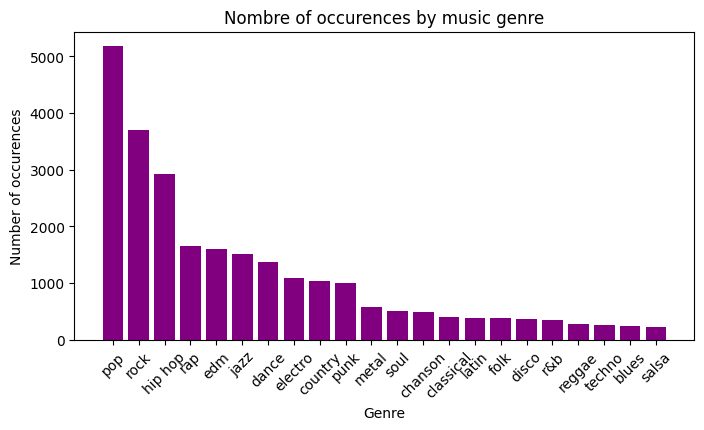

 The genres pop, rock and hip hop represent 46.30 % of the training dataset


In [8]:
# visualization of the genres'repartition
nb_genres = train_data['genre'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(nb_genres.index, nb_genres.values, color='purple')
plt.xlabel('Genre')
plt.ylabel('Number of occurences')
plt.title('Nombre of occurences by music genre')
plt.xticks(rotation=45)
plt.show()

print(f" The genres pop, rock and hip hop represent {nb_genres[['pop' , 'rock', 'hip hop']].values.sum()/nb_genres.values.sum()*100 :.2f} % of the training dataset")


# we see that the 3 genres 'pop', 'rock' and 'hip hop' are over represented in the dataset compared to the others: we may have to adjust the dataset
# otherwise, the classifier will not be able to predict well small classes
# we note that 'trap' genre is not represented

Data pre-processing: the idea is to have a set of pre-processed training data containing only numbers (floats or integers).

In [9]:
#  Data Preprocessing

# function to convert the release_date into only an int release_year,
# 3 cases : 'Y-m-d', 'Y-m' or 'Y'
# when we did not have the day or the month we transformed it into the first day of the month or the first day of the year
def transform_to_first_of_month(value):
    if isinstance(value, int):
        return f"{value}-01-01"
    elif isinstance(value, str) and value.isdigit() and len(value) == 4:
        return f"{int(value)}-01-01"
    elif isinstance(value, str):
        try:
            if len(value) == 7 and value[4] == '-':
                return f"{value}-01"
            date = datetime.strptime(value, '%Y-%m-%d')
            return date.strftime('%Y-%m-%d')
        except ValueError:
            return None
    return None

# so we encoded the genre and the explicit feature to have only numbers and we changed the release_date type
def preprocess_data(df, is_train=True):
    label_encoder = LabelEncoder()

    if is_train:

        df['genre'] = label_encoder.fit_transform(df['genre'])
        genres_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    df['explicit'] = label_encoder.fit_transform(df['explicit'])

    df['release_date'] = df['release_date'].apply(transform_to_first_of_month)
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['release_date'] = df['release_date'].dt.year

    return (df, genres_mapping) if is_train else df


train_data, genres_mapping = preprocess_data(train_data)

In [10]:
train_data.head()

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,2015,0,38,0.509,0.8720,2,-5.170,1,0.0547,0.0396,0.000015,0.3310,0.4860,95.969,194375,4,3
1,2021,0,58,0.182,0.0377,11,-33.748,0,0.0391,0.9870,0.957000,0.0804,0.0923,100.482,241804,4,2
2,2013,0,36,0.550,0.9410,0,-3.128,0,0.0849,0.0182,0.003750,0.3120,0.3510,145.006,260276,4,16
3,2012,0,0,0.569,0.7190,6,-8.399,0,0.0663,0.8670,0.941000,0.1760,0.6430,145.118,165200,4,0
4,2008,0,0,0.631,0.6610,8,-5.694,1,0.0558,0.0146,0.720000,0.3650,0.3300,130.004,245933,4,4


Correlation matrix with all features in numerical format

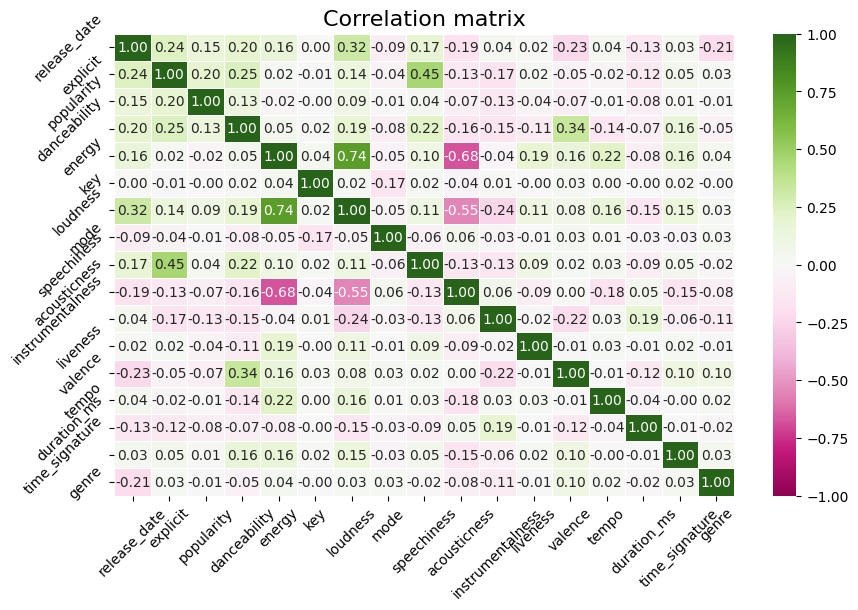

In [11]:
#vizualisation of corelations
x_corr = train_data
corr_matrix_train = x_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_train, annot=True, cmap='PiYG', fmt='.2f',
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# energy and loudness more positively correlated
# energy and acousticness more negatively correlated
# not much to say about the others features


### 2/ Classifiers Training

We use our pre-processed data set, where the target variable (genre) has been encoded, and the data set is in digital format.
y contains the class to be predicted (genre).
X contains the features useful for predicting genre.
We then divided them into training and validation sets to ensure an unbiased assessment of the models' generalization capabilities. We standardized the numerical features to improve model performance and comparability.

At first, we test different classifier model with no optimal hyper parameters, then we will take the best model (considering f1 score) and search the optimal parameters.

In [12]:
# Classifiers training


# Split features and target
X = train_data.drop(columns=['genre'])
y = train_data['genre']

# Split training data into train/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate each model
best_model = None
best_f1_score = 0
f1_scores = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    f1_scores[name] = f1
    print(f"{name} F1 Score (micro): {f1:.4f}")

    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = model

print("\nBest Model:", type(best_model).__name__)
print("Best F1 Score (micro):", best_f1_score)

# Visualize F1 scores
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score (micro)')
plt.title('F1 Score Comparison Across Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid()

# Annotate each bar with its F1 score
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2),
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Training Logistic Regression...
Logistic Regression F1 Score (micro): 0.4097
Training Random Forest...
Random Forest F1 Score (micro): 0.4752
Training Gradient Boosting...


KeyboardInterrupt: 

All the f1 score are not that good, doesn't go over 0,5. So we wonder if there is not a class repartition problem as we mentionned in the Data Analysis. So , we try the SMOTE method : SMOTE is designed to tackle class imbalance by oversampling the minority classes using synthetic examples rather than simply duplicating existing samples. This helps create a dataset where the minority class is better represented, improving model performance and reducing bias toward the majority class

In [ ]:
# same code but we added the SMOTE method on training data

X = train_data.drop(columns=['genre'])
y = train_data['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

best_model = None
best_f1_score = 0
f1_scores = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    f1_scores[name] = f1
    print(f"{name} F1 Score (micro): {f1:.4f}")

    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = model

print("\nBest Model:", type(best_model).__name__)
print("Best F1 Score (micro):", best_f1_score)

plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score (micro)')
plt.title('F1 Score Comparison Across Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2),
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Training Logistic Regression...
Logistic Regression F1 Score (micro): 0.3112
Training Random Forest...
Random Forest F1 Score (micro): 0.4195
Training Gradient Boosting...


Unfortunately, that does not improve the results. We used SMOTE on the training data because that would not make any sens on the complete dataset : When testing, you want to measure how well your model performs on data that matches the original, unaltered distribution. Applying SMOTE to the test data artificially balances it and no longer reflects the real-world scenario.



We tried to reduce the size of the features with a PCA method but we don't improve our score. So we do not keep this part for our final model.

In [ ]:
# Split features and target
X = train_data.drop(columns=['genre'])
y = train_data['genre']

# Split training data into train/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

f1_scores_pca = []
for n in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_test)

    model = RandomForestClassifier(random_state=0)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_val_pca)
    f1 = f1_score(y_test, y_pred, average='micro')
    f1_scores_pca.append(f1)
    print(f"PCA with {n} components: F1 Score = {f1:.4f}")

plt.plot(range(1, X_train.shape[1] + 1), f1_scores_pca, marker='o',color='red')
plt.xlabel('Number of PCA Components')
plt.ylabel('F1 Score (micro)')
plt.title('F1 Score vs Number of PCA Components')
plt.show()

PCA with 1 components: F1 Score = 0.1504


KeyboardInterrupt: 

As we said, we are going to search the optimal parameters for the RandomForest Classifier : To do that we used RandomizedSearchCV, tt helps us find the best combination of hyperparameters for the model by searching over a subset of possible hyperparameter combinations. RandomizedSearchCV samples a specified number of random combinations from the parameter space.

In [ ]:
# Split features and target
X = train_data.drop(columns=['genre'])
y = train_data['genre']

# Split training data into train/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters
param_dist_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(2, 20),
    'bootstrap': [True, False],
}

# Create the model
rf = RandomForestClassifier()

# Configure RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf,
    n_iter=100, cv=3, verbose=2,
    scoring='f1_micro', n_jobs=-1, random_state=42
)

# Training
random_search_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = random_search_rf.best_estimator_.predict(X_test)

# F1 score with micro average
f1_rf = f1_score(y_test, y_pred_rf, average='micro')

best_params_rf = random_search_rf.best_params_



Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print(f"Best F1 score for RandomForest: {f1_rf}")
print("Best hyperparameters for RandomForest:", best_params_rf)


Best F1 score for RandomForest: 0.47283781133555597
Best hyperparameters for RandomForest: {'bootstrap': False, 'max_depth': 19, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 241}


Here is our final model, an optimal RandomForest Classifier :

In [14]:
# Split features and target
X = train_data.drop(columns=['genre'])
y = train_data['genre']

# Split training data into train/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

optimal_rf = RandomForestClassifier(bootstrap= False, max_depth= 19, min_samples_leaf= 5, min_samples_split= 4, n_estimators=241)
optimal_rf.fit(X_train_scaled,y_train)

# Prediction
y_test_pred = optimal_rf.predict(X_test_scaled)

print("F1-score on test data :",f1_score(y_test, y_test_pred, average='micro'))

F1-score on test data : 0.4765640321631692


Conclusion : we did not manage to get over 0,5 for the f1 score with micro average. That means that predictions are not good. Indeed, we have much overfitting due to the non uniform repartition of the classes in our dataset and the complexity of the features. But as it is said, in practice the musical genre in spotify is not that well filled.

### 3/ Predictions of the 2833 songs of the test dataset

In [15]:
test_data = pd.read_csv('spotify_dataset_test.csv')
test_data = preprocess_data(test_data, is_train=False)
inverse_genres_mapping = {v: k for k, v in genres_mapping.items()}

X_test = test_data
X_test = scaler.transform(X_test)

# Make predictions
predictions = optimal_rf.predict(X_test)

# Convert predictions to genre names using genres_mapping
predicted_genres = [inverse_genres_mapping[pred] for pred in predictions]

# Add predicted genre names to the DataFrame
test_data['Predicted_Genre'] = predicted_genres

# Save the results to a new CSV file
test_data.to_csv("data_test_with_predictions.csv", index=False)
print("Predictions have been saved in 'data_test_with_predictions.csv'.")




Predictions have been saved in 'data_test_with_predictions.csv'.


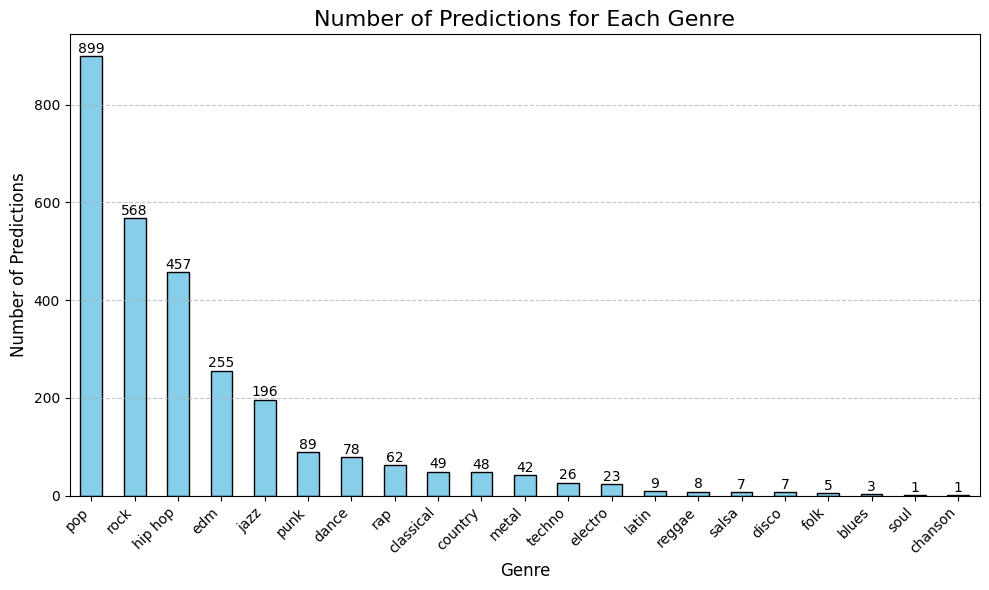

In [16]:
# Count the number of predictions for each genre
genre_counts = test_data['Predicted_Genre'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
bars = genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Number of Predictions for Each Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Predictions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on each bar
for i, count in enumerate(genre_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()



## Exercise 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime
from collections import Counter

Data observations

In [18]:
# Load the dataset
file_path = 'spotify_dataset_subset.csv'
spotify_data = pd.read_csv(file_path)

# Display the first few rows and basic info about the dataset
spotify_data_info = spotify_data.info()
spotify_data_head = spotify_data.head()


spotify_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8698 entries, 0 to 8697
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       8698 non-null   object 
 1   track_name        8698 non-null   object 
 2   release_date      8698 non-null   object 
 3   genres            8698 non-null   object 
 4   explicit          8698 non-null   bool   
 5   popularity        8698 non-null   int64  
 6   danceability      8698 non-null   float64
 7   energy            8698 non-null   float64
 8   key               8698 non-null   int64  
 9   loudness          8698 non-null   float64
 10  mode              8698 non-null   int64  
 11  speechiness       8698 non-null   float64
 12  acousticness      8698 non-null   float64
 13  instrumentalness  8698 non-null   float64
 14  liveness          8698 non-null   float64
 15  valence           8698 non-null   float64
 16  tempo             8698 non-null   float64


,artist_name,track_name,release_date,genres,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Marry,Vorglühn Nachglühn,2018-10-12,"['discofox', 'partyschlager', 'schlager']",False,42,0.728,0.936,6,-2.557,1,0.1690,0.036800,0.000000,0.323,0.509,144.968,0lLA33ZtNiWUOB3oATZUbR,174631,4
1,ABBA,Chiquitita,1979,"['europop', 'swedish pop']",False,75,0.500,0.554,9,-8.108,1,0.0354,0.734000,0.000004,0.312,0.372,84.229,762B4bOcXF7I2Y8UlKTyTy,326320,4
2,Drug Squad,Dangerous Trouble,2010-08-09,['deep punk rock'],False,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,0.785000,0.356,0.478,185.689,5TeP9dfDZivCzM20ucyHsy,277053,4
3,Ahmad Jamal,Poinciana,1958-05-23,"['bebop', 'cool jazz', 'jazz', 'jazz piano']",False,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,0.661000,0.873,0.570,97.980,1nTaXD1Kt2qE8Oq92rjdrX,487201,4
4,Korn,Make Me Bad,1999-11-01,"['alternative metal', 'funk metal', 'nu metal'...",True,0,0.527,0.792,11,-6.693,0,0.0363,0.000122,0.037000,0.249,0.424,110.038,0w6VKmDlUJyIqRcJ6hPwLf,235493,4


The columns 'explicit' and 'genre' will have to be encoded, the columns 'artist_name', 'track_name' and 'Id' can be deleted, the column 'release_date' will have to be put in a number format.

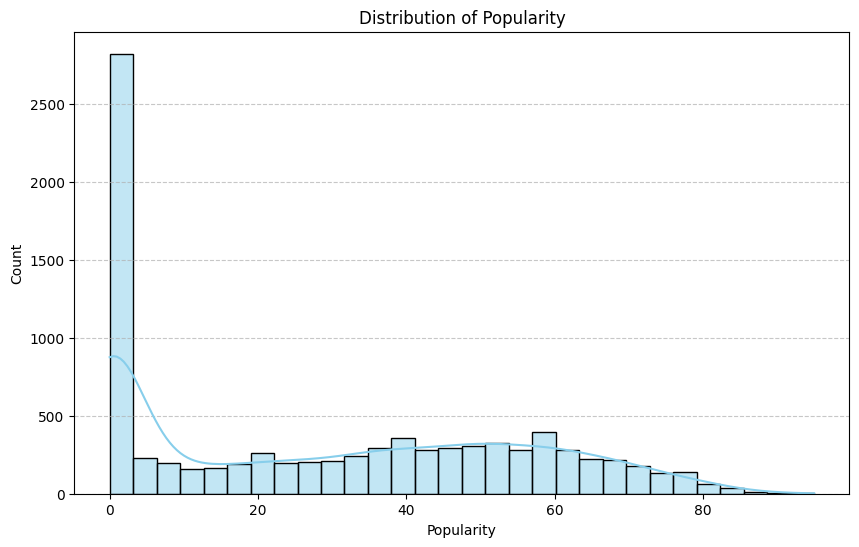

count    8698.000000
mean       28.857094
std        26.051292
min         0.000000
25%         0.000000
50%        27.000000
75%        51.750000
max        95.000000
Name: popularity, dtype: float64

In [19]:
# Convert 'genres' column to a list of genres
spotify_data['genres'] = spotify_data['genres'].apply(ast.literal_eval)

# Explore the popularity distribution
popularity_distribution = spotify_data['popularity'].describe()

# Plot the distribution of the popularity column
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

popularity_distribution

The popularity distribution reveals that a large number of the songs in the dataset have zero popularity, and we can interpret this in two different ways:
case 1: the sound is not popular, with a popularity score of 0.
case 2: the sound has no popularity score, so we can't predict it.
These two cases may have a different impact on the performance of the model considered for prediction.

as seen in the previous exercise, genre can be complicated to determine for a sound. The choice of genre encoding will be a first problem in the prediction of popularity. To help us, we have represented the genres by frequency of appearance.

C:\Users\dubma\AppData\Local\Temp\ipykernel_14520\1636623992.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(20), x='Count', y='Genre', palette='viridis')


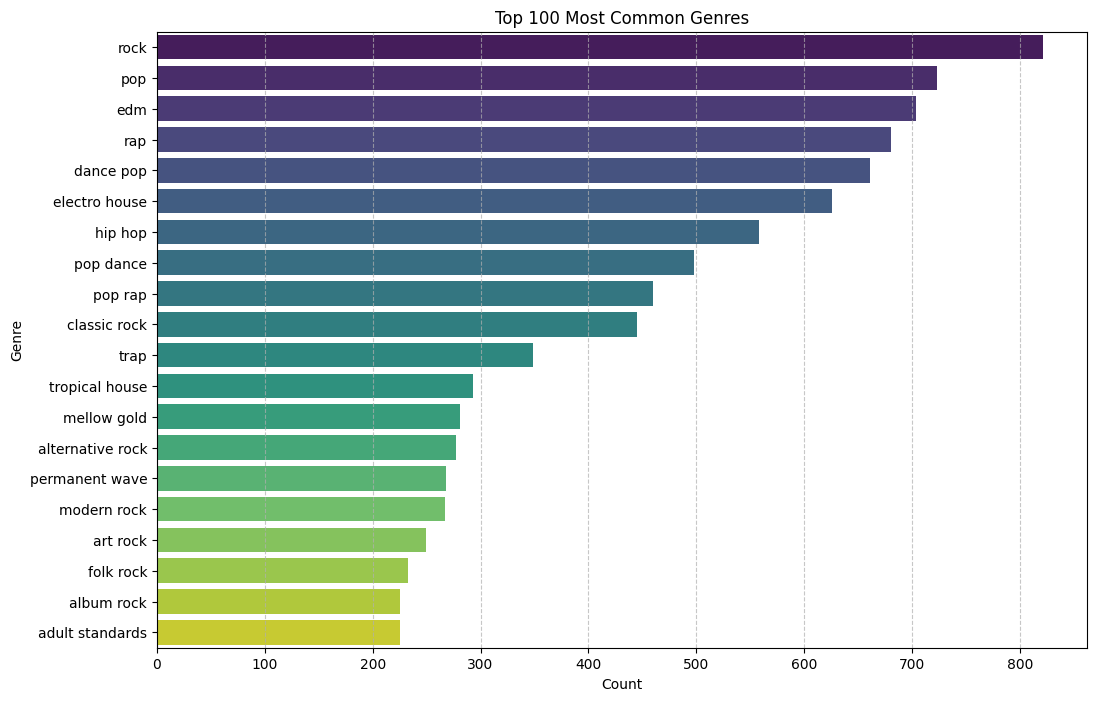

In [20]:
# Count the most common genres

# Flatten the list of genres across all songs
all_genres = [genre for sublist in spotify_data['genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Create a DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top 20 genres
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_df.head(20), x='Count', y='Genre', palette='viridis')
plt.title('Top 100 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#genre_df.head(20)

identical data pre-processing for explicit release_date and data to be deleted

In [21]:
# Data Preprocessing
# function to convert the release_date into only an int release_year,
# 3 cases : 'Y-m-d', 'Y-m' or 'Y'
# when we did not have the day or the month we transformed it into the first day of the month or the first day of the year
def transform_to_first_of_month(value):
    if isinstance(value, int):
        return f"{value}-01-01"
    elif isinstance(value, str) and value.isdigit() and len(value) == 4:
        return f"{int(value)}-01-01"
    elif isinstance(value, str):
        try:
            if len(value) == 7 and value[4] == '-':
                return f"{value}-01"
            date = datetime.strptime(value, '%Y-%m-%d')
            return date.strftime('%Y-%m-%d')
        except ValueError:
            return None
    return None

def preprocess_data(dataframe):
    df = dataframe.copy()
    label_encoder = LabelEncoder()
    df['explicit'] = label_encoder.fit_transform(df['explicit'])
    df['release_date'] = df['release_date'].apply(transform_to_first_of_month)
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['release_date'] = df['release_date'].dt.year
    df = df.drop(columns=['artist_name','track_name','id'])

    return df

spotify_data_process = preprocess_data(spotify_data)

In [22]:
spotify_data_process.head()

,release_date,genres,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2018,"[discofox, partyschlager, schlager]",0,42,0.728,0.936,6,-2.557,1,0.1690,0.036800,0.000000,0.323,0.509,144.968,174631,4
1,1979,"[europop, swedish pop]",0,75,0.500,0.554,9,-8.108,1,0.0354,0.734000,0.000004,0.312,0.372,84.229,326320,4
2,2010,[deep punk rock],0,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,0.785000,0.356,0.478,185.689,277053,4
3,1958,"[bebop, cool jazz, jazz, jazz piano]",0,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,0.661000,0.873,0.570,97.980,487201,4
4,1999,"[alternative metal, funk metal, nu metal, rap ...",1,0,0.527,0.792,11,-6.693,0,0.0363,0.000122,0.037000,0.249,0.424,110.038,235493,4


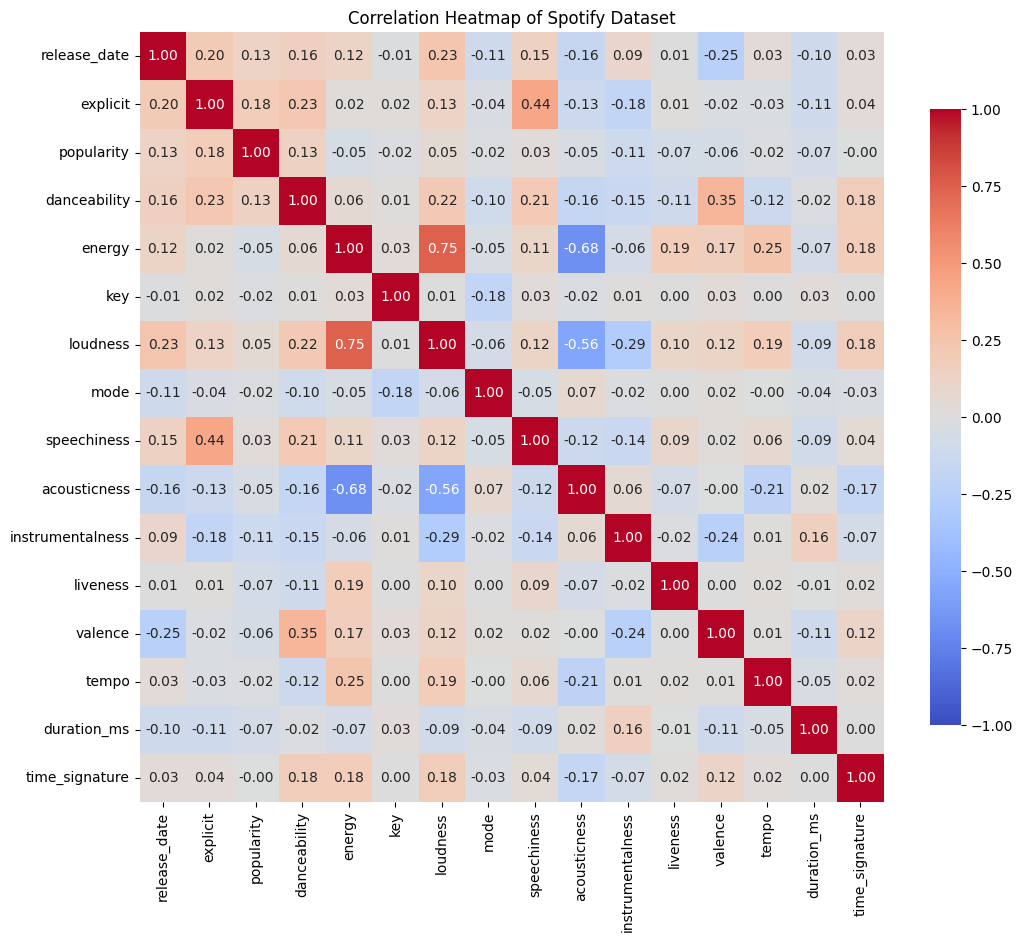

popularity          1.000000
explicit            0.184900
danceability        0.133927
release_date        0.129000
loudness            0.049156
speechiness         0.030857
time_signature     -0.004145
mode               -0.016645
tempo              -0.017577
key                -0.020659
acousticness       -0.045964
energy             -0.050192
valence            -0.058936
duration_ms        -0.068801
liveness           -0.071976
instrumentalness   -0.112269
Name: popularity, dtype: float64

In [23]:
# Calculate correlation matrix

correlation_matrix = spotify_data_process.select_dtypes(include=['number']).corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Spotify Dataset')
plt.show()

# Focus on popularity correlations
popularity_correlation = correlation_matrix['popularity'].sort_values(ascending=False)
popularity_correlation

genre encoding: first, we choose a multi-label encoding to preserve all the genres present.

In [24]:
def encode_genres_with_multiple_labels(spotify_data):

    # Extract all unique genres from the dataset
    unique_genres = set(genre for sublist in spotify_data['genres'] for genre in sublist)

    # Create one-hot encoded columns for each genre
    for genre in unique_genres:
        spotify_data[genre] = spotify_data['genres'].apply(lambda x: 1 if genre in x else 0)

    # Drop the original 'genres' column as it's now encoded
    spotify_data_encoded = spotify_data.drop(columns=['genres'])

    return spotify_data_encoded

spotify_data_enc = spotify_data_process.copy()
spotify_data_encoded_multiple_labels = encode_genres_with_multiple_labels(spotify_data_enc)

spotify_data_encoded_multiple_labels.head()


C:\Users\dubma\AppData\Local\Temp\ipykernel_14520\846655463.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spotify_data[genre] = spotify_data['genres'].apply(lambda x: 1 if genre in x else 0)
C:\Users\dubma\AppData\Local\Temp\ipykernel_14520\846655463.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spotify_data[genre] = spotify_data['genres'].apply(lambda x: 1 if genre in x else 0)
C:\Users\dubma\AppData\Local\Temp\ipykernel_14520\846655463.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,uk metalcore,louisville underground,deep disco house,southern rock,focus beats,deep funk,punk 'n' roll,free jazz,appalachian folk,glam rock
0,2018,0,42,0.728,0.936,6,-2.557,1,0.1690,0.036800,...,0,0,0,0,0,0,0,0,0,0
1,1979,0,75,0.500,0.554,9,-8.108,1,0.0354,0.734000,...,0,0,0,0,0,0,0,0,0,0
2,2010,0,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,...,0,0,0,0,0,0,0,0,0,0
3,1958,0,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,...,0,0,0,0,0,0,0,0,0,0
4,1999,1,0,0.527,0.792,11,-6.693,0,0.0363,0.000122,...,0,0,0,0,0,0,0,0,0,0


We chose to use regression to predict popularity because it is a quasi-continuous variable, which fits well with the regression framework. This model enables us to identify relationships between the various characteristics of songs and their popularity, while remaining interpretable. What's more, it offers an effective method for establishing a starting point before exploring more complex models if necessary.

first, we kept all the data (including sound with a popularity score of zero). The hyperparameters of each model were determined with a RandomizedSearchCV.
The R^2 score and RMSE metrics were used to evaluate model performance.

In [25]:
# Split the data into features (X) and target (y)
X = spotify_data_encoded_multiple_labels.drop(columns=['popularity'])
y = spotify_data_encoded_multiple_labels['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for models sensitive to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Ridge Regression
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
ridge_train_r2 = r2_score(y_train, y_pred_train)
ridge_test_r2 = r2_score(y_test, y_pred_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
lasso_train_r2 = r2_score(y_train, y_pred_train)
lasso_test_r2 = r2_score(y_test, y_pred_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators =300, min_samples_split=5, min_samples_leaf= 1, max_features='sqrt', max_depth= None, bootstrap= False)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
rf_train_rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
rf_test_rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
rf_train_r2 = r2_score(y_train, y_pred_train)
rf_test_r2 = r2_score(y_test, y_pred_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_train_rmse = np.sqrt(mean_squared_error(y_train, linear_reg.predict(X_train_scaled)))
linear_test_rmse = np.sqrt(mean_squared_error(y_test, linear_reg.predict(X_test_scaled)))
linear_train_r2 = r2_score(y_train, linear_reg.predict(X_train_scaled))
linear_test_r2 = r2_score(y_test, linear_reg.predict(X_test_scaled))

# Display results
print("Ridge Regression:")
print(f"  RMSE Training: {ridge_train_rmse}")
print(f"  RMSE Testing: {ridge_test_rmse}")
print(f"  R^2 Training: {ridge_train_r2}")
print(f"  R^2 Testing: {ridge_test_r2}")

print("\nLasso Regression:")
print(f"  RMSE Training: {lasso_train_rmse}")
print(f"  RMSE Testing: {lasso_test_rmse}")
print(f"  R^2 Training: {lasso_train_r2}")
print(f"  R^2 Testing: {lasso_test_r2}")

print("\nRandom Forest Regressor:")
print(f"  RMSE Training: {rf_train_rmse}")
print(f"  RMSE Testing: {rf_test_rmse}")
print(f"  R^2 Training: {rf_train_r2}")
print(f"  R^2 Testing: {rf_test_r2}")

print("\nLinear Regression:")
print(f"  RMSE Training: {linear_train_rmse}")
print(f"  RMSE Testing: {linear_test_rmse}")
print(f"  R^2 Training: {linear_train_r2}")
print(f"  R^2 Testing: {linear_test_r2}")

# Compile results into a dictionary for comparison
models_results = {
    "Ridge": {"RMSE_Test": ridge_test_rmse, "R2_Test": ridge_test_r2},
    "Lasso": {"RMSE_Test": lasso_test_rmse, "R2_Test": lasso_test_r2},
    "Random Forest": {"RMSE_Test": rf_test_rmse, "R2_Test": rf_test_r2},
    "Linear Regression": {"RMSE_Test": linear_test_rmse, "R2_Test": linear_test_r2},
}

# Find the best model based on R^2 and RMSE
best_model_r2 = max(models_results.items(), key=lambda x: x[1]['R2_Test'])
best_model_rmse = min(models_results.items(), key=lambda x: x[1]['RMSE_Test'])

# Display the best models
print("\nBest Model Based on R^2 (Testing):")
print(f"  Model: {best_model_r2[0]}")
print(f"  R^2 (Testing): {best_model_r2[1]['R2_Test']}")
print(f"  RMSE (Testing): {best_model_r2[1]['RMSE_Test']}")

print("\nBest Model Based on RMSE (Testing):")
print(f"  Model: {best_model_rmse[0]}")
print(f"  R^2 (Testing): {best_model_rmse[1]['R2_Test']}")
print(f"  RMSE (Testing): {best_model_rmse[1]['RMSE_Test']}")

Ridge Regression:
  RMSE Training: 23.152592813043935
  RMSE Testing: 23.701271878348244
  R^2 Training: 0.20769421328550164
  R^2 Testing: 0.1817404898539391

Lasso Regression:
  RMSE Training: 23.977755655085403
  RMSE Testing: 24.177547407905173
  R^2 Training: 0.15021194809103522
  R^2 Testing: 0.14852432725028797

Random Forest Regressor:
  RMSE Training: 5.727524157863853
  RMSE Testing: 21.80901681798183
  R^2 Training: 0.951512764952465
  R^2 Testing: 0.30718077226956053

Linear Regression:
  RMSE Training: 21.038114676525176
  RMSE Testing: 1776123693235712.2
  R^2 Training: 0.34580503644770333
  R^2 Testing: -4.595091595872867e+27

Best Model Based on R^2 (Testing):
  Model: Random Forest
  R^2 (Testing): 0.30718077226956053
  RMSE (Testing): 21.80901681798183

Best Model Based on RMSE (Testing):
  Model: Random Forest
  R^2 (Testing): 0.30718077226956053
  RMSE (Testing): 21.80901681798183


The best model is the Random Forest with an R2 score of 0.3046 and a RMSE  of 21.85

The same tests were carried out, but this time only considering sounds with a non-zero popularity score.

In [26]:
# Filter out rows where popularity is zero
spotify_data_encoded_multiple_labels = spotify_data_encoded_multiple_labels[spotify_data_encoded_multiple_labels['popularity'] > 0]

# Split the data into features (X) and target (y)
X = spotify_data_encoded_multiple_labels.drop(columns=['popularity'])
y = spotify_data_encoded_multiple_labels['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data for models sensitive to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Ridge Regression
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
ridge_train_r2 = r2_score(y_train, y_pred_train)
ridge_test_r2 = r2_score(y_test, y_pred_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
lasso_train_r2 = r2_score(y_train, y_pred_train)
lasso_test_r2 = r2_score(y_test, y_pred_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators =300, min_samples_split=5, min_samples_leaf= 1, max_features='sqrt', max_depth= None, bootstrap= False)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
rf_train_rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
rf_test_rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
rf_train_r2 = r2_score(y_train, y_pred_train)
rf_test_r2 = r2_score(y_test, y_pred_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_train_rmse = np.sqrt(mean_squared_error(y_train, linear_reg.predict(X_train_scaled)))
linear_test_rmse = np.sqrt(mean_squared_error(y_test, linear_reg.predict(X_test_scaled)))
linear_train_r2 = r2_score(y_train, linear_reg.predict(X_train_scaled))
linear_test_r2 = r2_score(y_test, linear_reg.predict(X_test_scaled))

# Display results
print("Ridge Regression:")
print(f"  RMSE Training: {ridge_train_rmse}")
print(f"  RMSE Testing: {ridge_test_rmse}")
print(f"  R^2 Training: {ridge_train_r2}")
print(f"  R^2 Testing: {ridge_test_r2}")

print("\nLasso Regression:")
print(f"  RMSE Training: {lasso_train_rmse}")
print(f"  RMSE Testing: {lasso_test_rmse}")
print(f"  R^2 Training: {lasso_train_r2}")
print(f"  R^2 Testing: {lasso_test_r2}")

print("\nRandom Forest Regressor:")
print(f"  RMSE Training: {rf_train_rmse}")
print(f"  RMSE Testing: {rf_test_rmse}")
print(f"  R^2 Training: {rf_train_r2}")
print(f"  R^2 Testing: {rf_test_r2}")

print("\nLinear Regression:")
print(f"  RMSE Training: {linear_train_rmse}")
print(f"  RMSE Testing: {linear_test_rmse}")
print(f"  R^2 Training: {linear_train_r2}")
print(f"  R^2 Testing: {linear_test_r2}")

# Display results
print("Ridge Regression:")
print(f"  RMSE Training: {ridge_train_rmse}")
print(f"  RMSE Testing: {ridge_test_rmse}")
print(f"  R^2 Training: {ridge_train_r2}")
print(f"  R^2 Testing: {ridge_test_r2}")

print("\nLasso Regression:")
print(f"  RMSE Training: {lasso_train_rmse}")
print(f"  RMSE Testing: {lasso_test_rmse}")
print(f"  R^2 Training: {lasso_train_r2}")
print(f"  R^2 Testing: {lasso_test_r2}")

print("\nRandom Forest Regressor:")
print(f"  RMSE Training: {rf_train_rmse}")
print(f"  RMSE Testing: {rf_test_rmse}")
print(f"  R^2 Training: {rf_train_r2}")
print(f"  R^2 Testing: {rf_test_r2}")

print("\nLinear Regression:")
print(f"  RMSE Training: {linear_train_rmse}")
print(f"  RMSE Testing: {linear_test_rmse}")
print(f"  R^2 Training: {linear_train_r2}")
print(f"  R^2 Testing: {linear_test_r2}")

# Compile results into a dictionary for comparison
models_results = {
    "Ridge": {"RMSE_Test": ridge_test_rmse, "R2_Test": ridge_test_r2},
    "Lasso": {"RMSE_Test": lasso_test_rmse, "R2_Test": lasso_test_r2},
    "Random Forest": {"RMSE_Test": rf_test_rmse, "R2_Test": rf_test_r2},
    "Linear Regression": {"RMSE_Test": linear_test_rmse, "R2_Test": linear_test_r2},
}

# Find the best model based on R^2 and RMSE
best_model_r2 = max(models_results.items(), key=lambda x: x[1]['R2_Test'])
best_model_rmse = min(models_results.items(), key=lambda x: x[1]['RMSE_Test'])

# Display the best models
print("\nBest Model Based on R^2 (Testing):")
print(f"  Model: {best_model_r2[0]}")
print(f"  R^2 (Testing): {best_model_r2[1]['R2_Test']}")
print(f"  RMSE (Testing): {best_model_r2[1]['RMSE_Test']}")

print("\nBest Model Based on RMSE (Testing):")
print(f"  Model: {best_model_rmse[0]}")
print(f"  R^2 (Testing): {best_model_rmse[1]['R2_Test']}")
print(f"  RMSE (Testing): {best_model_rmse[1]['RMSE_Test']}")


Ridge Regression:
  RMSE Training: 18.300822523751997
  RMSE Testing: 19.104340473916043
  R^2 Training: 0.31203352611005764
  R^2 Testing: 0.2676570189657024

Lasso Regression:
  RMSE Training: 18.972370391879405
  RMSE Testing: 19.584851881151604
  R^2 Training: 0.26061736736918295
  R^2 Testing: 0.2303540163531297

Random Forest Regressor:
  RMSE Training: 4.264795952722435
  RMSE Testing: 17.07370792909703
  R^2 Training: 0.9626386491256396
  R^2 Testing: 0.41506700411788033

Linear Regression:
  RMSE Training: 16.44316920120359
  RMSE Testing: 1276818662187062.8
  R^2 Training: 0.444611212983971
  R^2 Testing: -3.2712133369945515e+27
Ridge Regression:
  RMSE Training: 18.300822523751997
  RMSE Testing: 19.104340473916043
  R^2 Training: 0.31203352611005764
  R^2 Testing: 0.2676570189657024

Lasso Regression:
  RMSE Training: 18.972370391879405
  RMSE Testing: 19.584851881151604
  R^2 Training: 0.26061736736918295
  R^2 Testing: 0.2303540163531297

Random Forest Regressor:
  RMSE T

The best model is still the Random Forest, but with better performance.
R^2 score of : 0.4116
RMSE of : 17.1239

We decided to try two others method to encode the genres of each song with a goal to reduce the size of the data (1761 columns when considering all unique genres)

We decided to try two other methods for coding the genres of each song in order to reduce the size of the data (1761 columns considering all unique genres).
We used a method that considers genres with a threshold of at least 100 occurrences, and an integration method.

In [27]:
def encode_genres_with_threshold(data, threshold=100):

    # Count the occurrences of each genre
    all_genres = [genre for sublist in data['genres'] for genre in sublist]
    genre_counts = Counter(all_genres)

    # Keep only genres that meet the threshold
    frequent_genres = {genre for genre, count in genre_counts.items() if count >= threshold}

    # Create one-hot encoded columns for frequent genres
    for genre in frequent_genres:
        data[genre] = data['genres'].apply(lambda x: 1 if genre in x else 0)

    # Drop the original 'genres' column
    data = data.drop(columns=['genres'])
    return data

spotify_data_enc = spotify_data_process.copy()
spotify_data_encoded_threshold = encode_genres_with_threshold(spotify_data_enc)

spotify_data_encoded_threshold.head()

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,disco,nu metal,east coast hip hop,urban contemporary,pop dance,mellow gold,southern hip hop,pop,new wave,dance pop
0,2018,0,42,0.728,0.936,6,-2.557,1,0.1690,0.036800,...,0,0,0,0,0,0,0,0,0,0
1,1979,0,75,0.500,0.554,9,-8.108,1,0.0354,0.734000,...,0,0,0,0,0,0,0,0,0,0
2,2010,0,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,...,0,0,0,0,0,0,0,0,0,0
3,1958,0,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,...,0,0,0,0,0,0,0,0,0,0
4,1999,1,0,0.527,0.792,11,-6.693,0,0.0363,0.000122,...,0,1,0,0,0,0,0,0,0,0


this method resizes to 99 columns

In [28]:
def encode_genres_with_embeddings(data, embedding_dim=5):

    # Extract all unique genres
    all_genres = [genre for sublist in data['genres'] for genre in sublist]
    unique_genres = sorted(set(all_genres))

    # Assign a unique ID to each genre
    genre_to_id = {genre: idx for idx, genre in enumerate(unique_genres)}

    # Initialize random embeddings for each genre
    np.random.seed(42)  # For reproducibility
    genre_embeddings = {
        genre: np.random.rand(embedding_dim)
        for genre in unique_genres
    }

    # Function to compute song-level embeddings
    def compute_song_embedding(genres):
        if not genres:
            return np.zeros(embedding_dim)  # Handle empty genres
        song_embedding = np.mean([genre_embeddings[genre] for genre in genres], axis=0)
        return song_embedding

    # Compute embeddings for each song
    data['genre_embedding'] = data['genres'].apply(compute_song_embedding)

    # Drop the original 'genres' column
    data = data.drop(columns=['genres'])

    # Split the embedding into separate columns
    embedding_cols = [f'genre_emb_{i}' for i in range(embedding_dim)]
    embedding_df = pd.DataFrame(data['genre_embedding'].tolist(), columns=embedding_cols)
    data = pd.concat([data.reset_index(drop=True), embedding_df], axis=1)
    data = data.drop(columns=['genre_embedding'])

    return data


spotify_data_enc = spotify_data_process.copy()
spotify_data_encoded_with_embeddings = encode_genres_with_embeddings(spotify_data_enc, embedding_dim=5)

spotify_data_encoded_with_embeddings.head()


,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,genre_emb_0,genre_emb_1,genre_emb_2,genre_emb_3,genre_emb_4
0,2018,0,42,0.728,0.936,6,-2.557,1,0.1690,0.036800,...,0.323,0.509,144.968,174631,4,0.391287,0.489766,0.489411,0.484891,0.691759
1,1979,0,75,0.500,0.554,9,-8.108,1,0.0354,0.734000,...,0.312,0.372,84.229,326320,4,0.219189,0.585913,0.434698,0.525354,0.404952
2,2010,0,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,...,0.356,0.478,185.689,277053,4,0.636096,0.913287,0.612573,0.873699,0.723973
3,1958,0,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,...,0.873,0.570,97.980,487201,4,0.661929,0.276053,0.506430,0.656050,0.640879
4,1999,1,0,0.527,0.792,11,-6.693,0,0.0363,0.000122,...,0.249,0.424,110.038,235493,4,0.355055,0.664839,0.500212,0.650506,0.446517


We now test the Random Forest model for each method, considering the 2 cases for null popularity scores

In [29]:

# Function to store results
results = []

def evaluate_model(X, y, encoding_method, case_description):
    """
    Evaluates the model for a given dataset with a specific encoding method and case description.

    Parameters:
    X (DataFrame): Features of the dataset.
    y (Series): Target of the dataset.
    encoding_method (str): Name of the encoding method used.
    case_description (str): Description of the case (whether null data is kept or not).

    Returns:
    None
    """
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Standardize the data for models sensitive to scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False)
    rf.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_train = rf.predict(X_train_scaled)
    y_pred_test = rf.predict(X_test_scaled)

    # Calculate RMSE and R2 scores
    rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rf_train_r2 = r2_score(y_train, y_pred_train)
    rf_test_r2 = r2_score(y_test, y_pred_test)

    # Store the results
    results.append({
        'model': 'Random Forest Regressor',
        'encoding_method': encoding_method,
        'case': case_description,
        'train_rmse': rf_train_rmse,
        'test_rmse': rf_test_rmse,
        'train_r2': rf_train_r2,
        'test_r2': rf_test_r2
    })

# Apply tests for each encoding method and case

# Case 1: Keep all data
for encoding_method, encoding_func in [('Multiple Labels', encode_genres_with_multiple_labels),
                                       ('Threshold', encode_genres_with_threshold),
                                       ('Embeddings', encode_genres_with_embeddings)]:
    spotify_data_enc = spotify_data_process.copy()  # Create a copy of the data
    spotify_data_encoded = encoding_func(spotify_data_enc)  # Apply encoding function
    X = spotify_data_encoded.drop(columns=['popularity'])  # Features
    y = spotify_data_encoded['popularity']  # Target
    evaluate_model(X, y, encoding_method, 'All data')  # Evaluate the model with all data

# Case 2: Keep only non-zero popularity scores
for encoding_method, encoding_func in [('Multiple Labels', encode_genres_with_multiple_labels),
                                       ('Threshold', encode_genres_with_threshold),
                                       ('Embeddings', encode_genres_with_embeddings)]:
    spotify_data_enc = spotify_data_process.copy()  # Create a copy of the data
    spotify_data_encoded = encoding_func(spotify_data_enc)  # Apply encoding function
    spotify_data_encoded = spotify_data_encoded[spotify_data_encoded['popularity'] > 0]  # Filter out zero popularity
    X = spotify_data_encoded.drop(columns=['popularity'])  # Features
    y = spotify_data_encoded['popularity']  # Target
    evaluate_model(X, y, encoding_method, 'Non-zero popularity')  # Evaluate the model with non-zero popularity


C:\Users\dubma\AppData\Local\Temp\ipykernel_14520\846655463.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spotify_data[genre] = spotify_data['genres'].apply(lambda x: 1 if genre in x else 0)
C:\Users\dubma\AppData\Local\Temp\ipykernel_14520\846655463.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spotify_data[genre] = spotify_data['genres'].apply(lambda x: 1 if genre in x else 0)
C:\Users\dubma\AppData\Local\Temp\ipykernel_14520\846655463.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

KeyboardInterrupt: 

this method resizes to 21 columns

In [ ]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Display the summary of results
print(results_df)

# Optional: Find the best model (with the highest test R2 score)
best_model = results_df.loc[results_df['test_r2'].idxmax()]
print("Best Model:")
print(best_model)


                     model  encoding_method                 case  train_rmse  \
0  Random Forest Regressor  Multiple Labels             All data    5.672496   
1  Random Forest Regressor        Threshold             All data    4.567607   
2  Random Forest Regressor       Embeddings             All data    2.631213   
3  Random Forest Regressor  Multiple Labels  Non-zero popularity    4.253230   
4  Random Forest Regressor        Threshold  Non-zero popularity    3.565788   
5  Random Forest Regressor       Embeddings  Non-zero popularity    2.054562   

   test_rmse  train_r2   test_r2  
0  21.728281  0.952762  0.292352  
1  22.174766  0.969372  0.262971  
2  22.115737  0.989836  0.266890  
3  17.131254  0.962841  0.411117  
4  17.634878  0.973882  0.375985  
5  17.913895  0.991329  0.356082  
Best Model:
model              Random Forest Regressor
encoding_method            Multiple Labels
case                   Non-zero popularity
train_rmse                         4.25323
test_rmse 

we worked on predicting the “popularity” of songs using various features of the Spotify dataset. To handle the “genres” feature, we explored several encoding methods. After preprocessing the data, we applied a Random Forest regression model to predict song popularity based on the given features. This proved to be the most effective model tested. The model's performance was evaluated using measures such as RMSE and R2.
The best model was found to be the one using the multi-label method, considering only sounds with a positive popularity score, a choice that may be debated.

We also tested other models, but they proved to be much less effective:

Neural Network: RMSE: 27.98 and R2 Score: -0.17

KNN: RMSE: 23.92 and R2 Score: 0.1665

SVM : RMSE: 24.5722 and R2 Score: 0.1205

Finally, we performed a cross-validation on our most optimal model (RandomForest).
And we plotted the features that most explain popularity.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Filter the data for non-zero popularity
spotify_data_encoded_multiple_labels = spotify_data_encoded_multiple_labels[spotify_data_encoded_multiple_labels['popularity'] > 0]

# Split features (X) and target (y)
X = spotify_data_encoded_multiple_labels.drop(columns=['popularity'])
y = spotify_data_encoded_multiple_labels['popularity']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the model
rf = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False
)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)  # 5-fold cross-validation
cv_scores = cross_val_score(rf, X_scaled, y, cv=kf, scoring='r2')

# Display the results
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())
print("Standard Deviation of R2 Scores:", cv_scores.std())




Cross-Validation R2 Scores: [0.41126811 0.44293174 0.4313781  0.4035411  0.44457952]
Mean R2 Score: 0.42673971239779285
Standard Deviation of R2 Scores: 0.016610243703658278


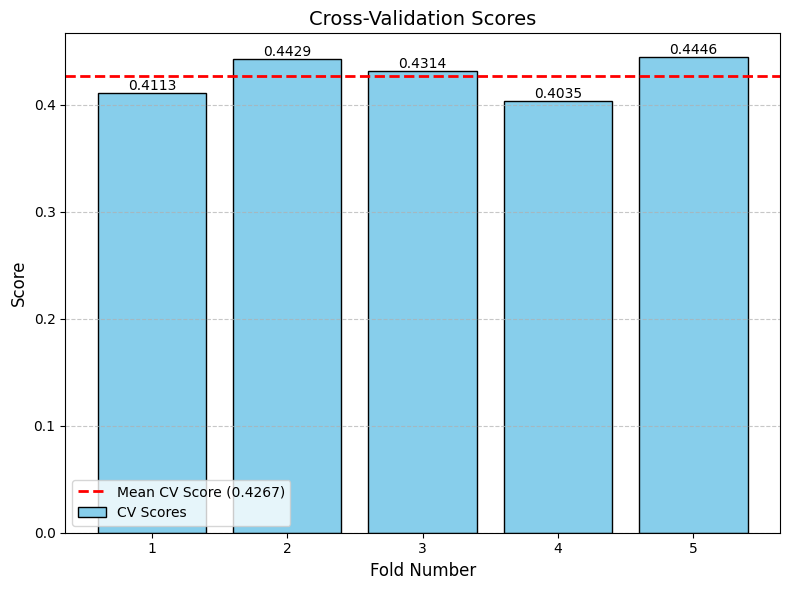

In [ ]:
# Calculate the mean of cv_scores
mean_cv_score = np.mean(cv_scores)

# Plot the CV scores for each fold
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color="skyblue", edgecolor="black", label="CV Scores")

# Add the mean as a dashed line
plt.axhline(y=mean_cv_score, color="red", linestyle="--", linewidth=2, label=f"Mean CV Score ({mean_cv_score:.4f})")

# Annotate the scores on each bar
for i, score in enumerate(cv_scores, start=1):
    plt.text(i, score, f"{score:.4f}", ha="center", va="bottom", fontsize=10)

# Add labels, title, and legend
plt.title("Cross-Validation Scores", fontsize=14)
plt.xlabel("Fold Number", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


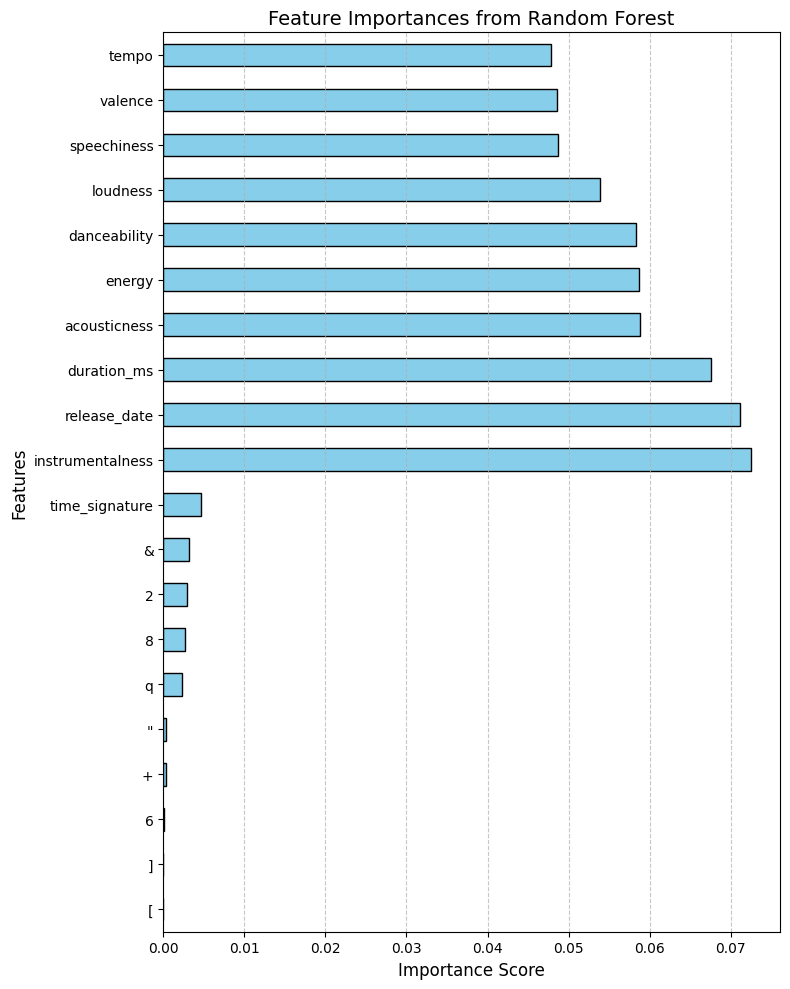

In [ ]:
# Filter out rows where popularity is zero
spotify_data_encoded_multiple_labels = spotify_data_encoded_multiple_labels[spotify_data_encoded_multiple_labels['popularity'] > 0]

# Split the data into features (X) and target (y)
X = spotify_data_encoded_multiple_labels.drop(columns=['popularity'])
y = spotify_data_encoded_multiple_labels['popularity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data (optional for Random Forest, but helpful if feature magnitudes vary significantly)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False, random_state=0)
rf.fit(X_train_scaled, y_train)
# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Select the top 10 most important and least important features
top_features = feature_importances.nlargest(10)
bottom_features = feature_importances.nsmallest(10)

# Combine and visualize
important_features = pd.concat([bottom_features, top_features])
plt.figure(figsize=(8, 10))
important_features.plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Feature Importances from Random Forest", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Exercise 3 :

This exercise is about a non supervised classifcation problem. Indeed we want to return the closest songs to a song or a list of songs thanks to the 19 features of the "recommendation_sptofify" dataset.
Unlike the previous exercises, we don't have any labels to predict but we want to group the songs close to each other. This kind of algorithm is used in apps such as Spotify or Deezer to personalize and suggest songs that users may enjoy. So we will try to reproduce the mechanism behind this.

There are many methods of search by similarity such as exact search or Approximate Nearest Neighbors (LSH). In our case we are going to use an exact search, which gives more precise results (by calculating distance with vectors) but with high computational cost. We use NearestNeighbors from sklearn.neighbors to return the k_nearest_neighbors of a query which means we return a sort of playlist given a song.

The dataset contains 174 389 songs given by the spotify API, with 19 features. We decided to use these data without the 3 features ['id','artists', 'name'] to simplify the distance's calculs. Otherwise we would have had to vectorize these features. Moreover, we think that the artist information can be found in the others features, assuming that an artist stays in the same musical register. And in reality, it is interesting to suggest close songs to the user's tastes, from a different artist. Also the name of a song does not give necessarily informations about its type.

### 1/ Here is our method that return a playlist given a song :

In [4]:
ds_recom = pd.read_csv('recommendation_spotify.csv')


# data preprocess like we did before
def transform_to_first_of_month(value):
    if isinstance(value, int):
        return f"{value}-01-01"
    elif isinstance(value, str) and value.isdigit() and len(value) == 4:
        return f"{int(value)}-01-01"
    elif isinstance(value, str):
        try:
            if len(value) == 7 and value[4] == '-':
                return f"{value}-01"
            date = datetime.strptime(value, '%Y-%m-%d')
            return date.strftime('%Y-%m-%d')
        except ValueError:
            return None
    return None

ds_recom['release_date'] = ds_recom['release_date'].apply(transform_to_first_of_month)
ds_recom['release_date'] = pd.to_datetime(ds_recom['release_date'], errors='coerce')
ds_recom['release_date'] = ds_recom['release_date'].dt.year



# playlist method

def playlist_spotify(data, song_name, playlist_size):
    try:
        first_index = data[data['name'] == song_name].index[0] # find index of the song in database
    except IndexError:
        return f"'{song_name}' not found in the dataset."

    data_knn = data.drop(columns=['id', 'artists', 'name'])

    # Standardise data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data_knn)

    # KNN Model
    knn = NearestNeighbors(n_neighbors=playlist_size + 1, metric='euclidean')  # +1 pour exclure la requête
    knn.fit(X_scaled)

    query = X_scaled[first_index].reshape(1, -1)
    distances, indices = knn.kneighbors(query)

    # Remove the query song from the playlist
    indices = indices[0][1:]

    playlist = data.iloc[indices][['name', 'artists']]

    print(f"Voici votre playlist de {playlist_size} sons basés sur la musique '{data.iloc[first_index]['name']}' "
          f"de {data.iloc[first_index]['artists']} :\n")

    for _, row in playlist.iterrows():
        print(f"Nom : {row['name']}\nArtiste : {row['artists']}\n---")

    return playlist

playlist_spotify(ds_recom, "Hier encore", 5)

Voici votre playlist de 5 sons basés sur la musique 'Hier encore' de ['Charles Aznavour'] :

Nom : L'amour et la guerre
Artiste : ['Charles Aznavour']
---
Nom : A Sunday Kind Of Love
Artiste : ['Etta James']
---
Nom : Porque Yo Te Amo
Artiste : ['Sandro']
---
Nom : Que c'est triste Venise
Artiste : ['Charles Aznavour']
---
Nom : Porque Yo Te Amo
Artiste : ['Sandro']
---


,name,artists
46546,L'amour et la guerre,['Charles Aznavour']
7865,A Sunday Kind Of Love,['Etta James']
47894,Porque Yo Te Amo,['Sandro']
8841,Que c'est triste Venise,['Charles Aznavour']
29082,Porque Yo Te Amo,['Sandro']


We can easily adapt the method to have directly the index in input (in the case where there are many songs with the same name). We tried the method with many songs and the results where really satisfying. But we can not really measure the performance ouf our algorithm as it is non supervised classification.

### 2/ How can we extend this to take in account all users experience?


To extend the song recommendation system to account for all users' experiences, we can combine collaborative filtering and content-based filtering. Collaborative filtering relies on user-song interactions, such as likes or listening history, to identify similar users and recommend songs they liked. Content-based filtering uses song features (e.g., genre, tempo) to recommend similar songs to the input. A hybrid system merges these approaches by not only considering a song's features but also aggregating the preferences of similar users, adjusting recommendations based on both song similarity and user history. This way, the system can recommend songs that match both the user’s personal taste and the preferences of similar users, ensuring more personalized and relevant playlists